# Analisis Sentimen Tweet dengan Tweet-Harvest dan Vader Lexicon

## **Deskripsi proyek**
Proyek ini bertujuan untuk melakukan **scraping data Twitter** menggunakan **Selenium** dan kemudian melakukan **analisis sentimen** terhadap tweet yang diambil.

Setelah di scraping data akan dianalisis dengan **Vader Lexicon** untuk menentukan sentimen tweet (**positif, netral, atau negatif**). Proyek ini dapat digunakan untuk melihat tren opini publik terhadap suatu topik tertentu.

## **Tekhnologi yang Digunakan**
- **Tweet-Harvest** : Untuk scraping data Twitter
- **Google Translate API** : Untuk mentranslate data kedalam bahasa Inggris
- **Vader Lexicon** : Untuk analisis sentimen
- **Matplotlib & Seaborn** : Untuk visualisasi data hasil analisis
- **Pandas** : Pengelolaan data

## **Hasil yang Diharapkan**
1. Dataset berisi tweet yang berhasil diambil dari Twitter.
2. Analisis sentimen tweet (positif, netral, negatif)
3. Visualisasi distribusi sentimen berdasarkan hasil analisis.

# Scraping Data Twitter

Crawling data disini menggunakan node.js dengan Twitter Crawler dari tweet-harvest. Kemudian untuk menghasilkan file csv nya menggunakan perintah pandas dari python.

In [1]:
# Import required Python package
!pip install pandas

# Install Node.js (because tweet-harvest built using Node.js)
!sudo apt-get update
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

!sudo apt-get update
!sudo apt-get install nodejs -y

!node -v

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,309 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [66.7 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,653 kB]
Get:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:13 https://ppa.launchpadco

Disini diharapkan harus mempunyai authtoken Twitter.

In [3]:
# Crawl Data

filename = 'crawling.csv'
search_keyword = 'Pemerintah Indonesia lang:id until:2025-02-09 since:2025-01-01'
limit = 100

!npx --yes tweet-harvest@latest -o "{filename}" -s "{search_keyword}" -l {limit} --token "45008a3433ae36625ca25befbeff994404430fa"

⠙⠹⠸⠼⠴⠦Tweet Harvest [v2.6.1]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.


Opening twitter search page...


-- Scrolling... (1) (2)
Filling in keywords: Pemerintah Indonesia lang:id until:2025-02-09 since:2025-01-01

 (3)Created new directory: /content/tweets-data


Your tweets saved to: /content/tweets-data/crawling.csv
Total tweets saved: 19

-- Scrolling... (1) (2) (3) (4) (5)

Your tweets saved to: /content/tweets-data/crawling.csv
Total tweets saved: 39

-- Scrolling... (1) (2) (3) (4) (5) (6)

Your tweets saved to: /content/tweets-data/crawling.csv
Total tweets saved: 59

-- Scrolling... (1) (2)

Your tweets saved to: /content/tweets-data/crawling.csv
Total tweets saved: 79

-- Scrolling... (1) (2) (

Menampilkan hasil dalam bentuk dataframe.

In [4]:
import pandas as pd

file_path = f"tweets-data/{filename}"
df = pd.read_csv(file_path)
df.head(10)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1878529606170616062,Sun Jan 12 19:48:54 +0000 2025,19707,Indonesia negara yang pejabatnya terlalu tolol...,1878529606170616062,NaN,NaN,in,"DKI Jakarta, Indonesia",230,193,6913,https://x.com/kafir_introver/status/1878529606...,1794541716911075328,kafir_introver
1,1888124468763217959,Sat Feb 08 07:15:27 +0000 2025,8961,tipikal org indonesia benci ke pemerintah karn...,1888124468763217959,NaN,NaN,in,NaN,52,46,1969,https://x.com/laemersen/status/188812446876321...,4201538752,laemersen
2,1887018321247396168,Wed Feb 05 06:00:01 +0000 2025,8,Pemerintah menyiapkan lebih dari Rp700 triliun...,1887018321247396168,https://pbs.twimg.com/amplify_video_thumb/1885...,NaN,in,"Bonn, Jerman",0,5,4,https://x.com/dw_indonesia/status/188701832124...,150581612,dw_indonesia
3,1888150785265115426,Sat Feb 08 09:00:02 +0000 2025,11,Menurutnya pemberian izin tambang kepada kampu...,1888150785265115426,https://pbs.twimg.com/media/GjQPITaaQAEDDlS.jpg,NaN,in,NaN,0,0,1,https://x.com/MongabayID/status/18881507852651...,483310591,MongabayID
4,1887486387051766276,Thu Feb 06 12:59:57 +0000 2025,5,Innaa Lillaahi.... RAKYAT INDONESIA TETAP HARU...,1887486387051766276,https://pbs.twimg.com/media/GjGy3claQAE_lzo.jpg,NaN,in,NaN,0,1,3,https://x.com/Muslim_AntiPKI9/status/188748638...,1604091267834474498,Muslim_AntiPKI9
5,1880431818694095231,Sat Jan 18 09:51:54 +0000 2025,3102,@Peroronchino0 Indonesia is full of religious ...,1880553695601119729,NaN,Peroronchino0,en,NaN,60,19,853,https://x.com/putraseptiadii/status/1880553695...,631320554,putraseptiadii
6,1887121155435225561,Wed Feb 05 12:54:36 +0000 2025,2,13 milyar dialokasi oleh USAID untuk polio di ...,1887122654278431056,https://pbs.twimg.com/media/GjBoDbAaYAAoM7_.jpg,RakhaRakha45,in,NaN,0,2,0,https://x.com/RakhaRakha45/status/188712265427...,1799681310103134208,RakhaRakha45
7,1886614713389170954,Tue Feb 04 03:16:13 +0000 2025,927,#PeringatanDarurat gua cinta indonesia gua cin...,1886614713389170954,https://pbs.twimg.com/media/Gi6aFT4a4AMFrQp.jpg,NaN,in,"XII, Auristela.",3,10,393,https://x.com/jieno/status/1886614713389170954,810142189619585024,jieno
8,1886335624661311860,Mon Feb 03 08:47:13 +0000 2025,144,harusnya aku gak tinggal di indonesia makin ha...,1886335624661311860,NaN,NaN,in,STAY 2기 • INA-ENG,2,11,37,https://x.com/hanIogys/status/1886335624661311860,823496950523654144,hanIogys
9,1882809641379430802,Fri Jan 24 15:16:14 +0000 2025,287,Wajib di INDONESIA ! Dalam waktu dekat kita ak...,1882809641379430802,https://pbs.twimg.com/ext_tw_video_thumb/18828...,NaN,in,INDONESIA,7,11,127,https://x.com/sutanmangara/status/188280964137...,1227719379103571968,sutanmangara


Simpan data scraping kedalam csv.

In [5]:
df.to_csv('hasil-scraping-tweet-harvest_pemerintah-indo.csv', index=False, sep=";") # Ganti nama file yang akan disimpan

# Cleaning Data

Sebelum melakukan analisis sentimen, data tweet perlu dibersihkan terlebih dahulu dari link, emoji dsb yang ada, agar tidak memperngaruhi nilai sentimen nantinya.

In [6]:
# Import library yang dibutuhkan
import numpy as np
import string
import re
import pandas as pd

Menghapus username yang terdapat pada data tweet.

In [7]:
def remove_pattern(Text, pattern):
    r = re.findall(pattern, str(Text))
    for i in r:
        Text = re.sub(i, '', str(Text))
    return Text
df['remove_user'] = np.vectorize(remove_pattern)(df['full_text'], "@[\w]*")

In [8]:
df.head(10)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,remove_user
0,1878529606170616062,Sun Jan 12 19:48:54 +0000 2025,19707,Indonesia negara yang pejabatnya terlalu tolol...,1878529606170616062,NaN,NaN,in,"DKI Jakarta, Indonesia",230,193,6913,https://x.com/kafir_introver/status/1878529606...,1794541716911075328,kafir_introver,Indonesia negara yang pejabatnya terlalu tolol...
1,1888124468763217959,Sat Feb 08 07:15:27 +0000 2025,8961,tipikal org indonesia benci ke pemerintah karn...,1888124468763217959,NaN,NaN,in,NaN,52,46,1969,https://x.com/laemersen/status/188812446876321...,4201538752,laemersen,tipikal org indonesia benci ke pemerintah karn...
2,1887018321247396168,Wed Feb 05 06:00:01 +0000 2025,8,Pemerintah menyiapkan lebih dari Rp700 triliun...,1887018321247396168,https://pbs.twimg.com/amplify_video_thumb/1885...,NaN,in,"Bonn, Jerman",0,5,4,https://x.com/dw_indonesia/status/188701832124...,150581612,dw_indonesia,Pemerintah menyiapkan lebih dari Rp700 triliun...
3,1888150785265115426,Sat Feb 08 09:00:02 +0000 2025,11,Menurutnya pemberian izin tambang kepada kampu...,1888150785265115426,https://pbs.twimg.com/media/GjQPITaaQAEDDlS.jpg,NaN,in,NaN,0,0,1,https://x.com/MongabayID/status/18881507852651...,483310591,MongabayID,Menurutnya pemberian izin tambang kepada kampu...
4,1887486387051766276,Thu Feb 06 12:59:57 +0000 2025,5,Innaa Lillaahi.... RAKYAT INDONESIA TETAP HARU...,1887486387051766276,https://pbs.twimg.com/media/GjGy3claQAE_lzo.jpg,NaN,in,NaN,0,1,3,https://x.com/Muslim_AntiPKI9/status/188748638...,1604091267834474498,Muslim_AntiPKI9,Innaa Lillaahi.... RAKYAT INDONESIA TETAP HARU...
5,1880431818694095231,Sat Jan 18 09:51:54 +0000 2025,3102,@Peroronchino0 Indonesia is full of religious ...,1880553695601119729,NaN,Peroronchino0,en,NaN,60,19,853,https://x.com/putraseptiadii/status/1880553695...,631320554,putraseptiadii,Indonesia is full of religious hypocrisy. Don...
6,1887121155435225561,Wed Feb 05 12:54:36 +0000 2025,2,13 milyar dialokasi oleh USAID untuk polio di ...,1887122654278431056,https://pbs.twimg.com/media/GjBoDbAaYAAoM7_.jpg,RakhaRakha45,in,NaN,0,2,0,https://x.com/RakhaRakha45/status/188712265427...,1799681310103134208,RakhaRakha45,13 milyar dialokasi oleh USAID untuk polio di ...
7,1886614713389170954,Tue Feb 04 03:16:13 +0000 2025,927,#PeringatanDarurat gua cinta indonesia gua cin...,1886614713389170954,https://pbs.twimg.com/media/Gi6aFT4a4AMFrQp.jpg,NaN,in,"XII, Auristela.",3,10,393,https://x.com/jieno/status/1886614713389170954,810142189619585024,jieno,#PeringatanDarurat gua cinta indonesia gua cin...
8,1886335624661311860,Mon Feb 03 08:47:13 +0000 2025,144,harusnya aku gak tinggal di indonesia makin ha...,1886335624661311860,NaN,NaN,in,STAY 2기 • INA-ENG,2,11,37,https://x.com/hanIogys/status/1886335624661311860,823496950523654144,hanIogys,harusnya aku gak tinggal di indonesia makin ha...
9,1882809641379430802,Fri Jan 24 15:16:14 +0000 2025,287,Wajib di INDONESIA ! Dalam waktu dekat kita ak...,1882809641379430802,https://pbs.twimg.com/ext_tw_video_thumb/18828...,NaN,in,INDONESIA,7,11,127,https://x.com/sutanmangara/status/188280964137...,1227719379103571968,sutanmangara,Wajib di INDONESIA ! Dalam waktu dekat kita ak...


Membersihkan karakter/emoji, link dsb.

In [9]:
def cleaning(Text):      #
    Text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', Text)     #untuk menghapus semua URL atau tautan web dari teks.
    Text = re.sub(r"\s+", " ", str(Text))       #digunakan untuk menggantikan satu atau lebih spasi berturut-turut dalam teks
    Text = re.sub(r'#', '', Text)         #digunakan untuk menghapus semua tanda pagar (#) dalam teks
    Text = re.sub(r'\s\s+', ' ', Text)      #Digunakan untuk menggantikan dua atau lebih spasi berturut-turut dalam teks dengan satu spasi tunggal.
    Text = re.sub(r'^b[\s]+', '', Text)       #digunakan untuk menghapus spasi di awal teks
    Text = re.sub(r'^link[\s]+', '', Text)      #digunakan untuk menghapus string "link" yang diikuti oleh spasi di awal teks
    return Text

def remove_emoji(Text):
    emoji = re.compile("["
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # simbol & piktogram
                        u"\U0001F680-\U0001F6FF"  # transportasi & simbol peralatan
                        u"\U0001F1E0-\U0001F1FF"  # bendera negara
                        u"\U00002702-\U000027B0"  # simbol
                        u"\U000024C2-\U0001F251"  # emoji lainnya
                        "]+", flags=re.UNICODE)
    return emoji.sub(r'', Text)

df['cleaning'] = df['remove_user'].apply(cleaning)

In [10]:
df.head(10)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,remove_user,cleaning
0,1878529606170616062,Sun Jan 12 19:48:54 +0000 2025,19707,Indonesia negara yang pejabatnya terlalu tolol...,1878529606170616062,NaN,NaN,in,"DKI Jakarta, Indonesia",230,193,6913,https://x.com/kafir_introver/status/1878529606...,1794541716911075328,kafir_introver,Indonesia negara yang pejabatnya terlalu tolol...,Indonesia negara yang pejabatnya terlalu tolol...
1,1888124468763217959,Sat Feb 08 07:15:27 +0000 2025,8961,tipikal org indonesia benci ke pemerintah karn...,1888124468763217959,NaN,NaN,in,NaN,52,46,1969,https://x.com/laemersen/status/188812446876321...,4201538752,laemersen,tipikal org indonesia benci ke pemerintah karn...,tipikal org indonesia benci ke pemerintah karn...
2,1887018321247396168,Wed Feb 05 06:00:01 +0000 2025,8,Pemerintah menyiapkan lebih dari Rp700 triliun...,1887018321247396168,https://pbs.twimg.com/amplify_video_thumb/1885...,NaN,in,"Bonn, Jerman",0,5,4,https://x.com/dw_indonesia/status/188701832124...,150581612,dw_indonesia,Pemerintah menyiapkan lebih dari Rp700 triliun...,Pemerintah menyiapkan lebih dari Rp700 triliun...
3,1888150785265115426,Sat Feb 08 09:00:02 +0000 2025,11,Menurutnya pemberian izin tambang kepada kampu...,1888150785265115426,https://pbs.twimg.com/media/GjQPITaaQAEDDlS.jpg,NaN,in,NaN,0,0,1,https://x.com/MongabayID/status/18881507852651...,483310591,MongabayID,Menurutnya pemberian izin tambang kepada kampu...,Menurutnya pemberian izin tambang kepada kampu...
4,1887486387051766276,Thu Feb 06 12:59:57 +0000 2025,5,Innaa Lillaahi.... RAKYAT INDONESIA TETAP HARU...,1887486387051766276,https://pbs.twimg.com/media/GjGy3claQAE_lzo.jpg,NaN,in,NaN,0,1,3,https://x.com/Muslim_AntiPKI9/status/188748638...,1604091267834474498,Muslim_AntiPKI9,Innaa Lillaahi.... RAKYAT INDONESIA TETAP HARU...,Innaa Lillaahi.... RAKYAT INDONESIA TETAP HARU...
5,1880431818694095231,Sat Jan 18 09:51:54 +0000 2025,3102,@Peroronchino0 Indonesia is full of religious ...,1880553695601119729,NaN,Peroronchino0,en,NaN,60,19,853,https://x.com/putraseptiadii/status/1880553695...,631320554,putraseptiadii,Indonesia is full of religious hypocrisy. Don...,Indonesia is full of religious hypocrisy. Don...
6,1887121155435225561,Wed Feb 05 12:54:36 +0000 2025,2,13 milyar dialokasi oleh USAID untuk polio di ...,1887122654278431056,https://pbs.twimg.com/media/GjBoDbAaYAAoM7_.jpg,RakhaRakha45,in,NaN,0,2,0,https://x.com/RakhaRakha45/status/188712265427...,1799681310103134208,RakhaRakha45,13 milyar dialokasi oleh USAID untuk polio di ...,13 milyar dialokasi oleh USAID untuk polio di ...
7,1886614713389170954,Tue Feb 04 03:16:13 +0000 2025,927,#PeringatanDarurat gua cinta indonesia gua cin...,1886614713389170954,https://pbs.twimg.com/media/Gi6aFT4a4AMFrQp.jpg,NaN,in,"XII, Auristela.",3,10,393,https://x.com/jieno/status/1886614713389170954,810142189619585024,jieno,#PeringatanDarurat gua cinta indonesia gua cin...,PeringatanDarurat gua cinta indonesia gua cint...
8,1886335624661311860,Mon Feb 03 08:47:13 +0000 2025,144,harusnya aku gak tinggal di indonesia makin ha...,1886335624661311860,NaN,NaN,in,STAY 2기 • INA-ENG,2,11,37,https://x.com/hanIogys/status/1886335624661311860,823496950523654144,hanIogys,harusnya aku gak tinggal di indonesia makin ha...,harusnya aku gak tinggal di indonesia makin ha...
9,1882809641379430802,Fri Jan 24 15:16:14 +0000 2025,287,Wajib di INDONESIA ! Dalam waktu dekat kita ak...,1882809641379430802,https://pbs.twimg.com/ext_tw_video_thumb/18828...,NaN,in,INDONESIA,7,11,127,https://x.com/sutanmangara/status/188280964137...,1227719379103571968,sutanmangara,Wajib di INDONESIA ! Dalam waktu dekat kita ak...,Wajib di INDONESIA ! Dalam waktu dekat kita ak...


# Labeling Sentimen

Disini untuk labeling sentimen menggunakan vader lexicon, yang mana data tweet nanti akan di ubah ke dalam format bahasa ingris terlebih dahulu agar hasilnya terdektesi. Karena vade lexicon tidak bisa mendektesi bahasa selain bahasa ingris. Dan untuk labeling disini menggunakan 3 kelas sentimen; positif, netral dan negatif.

In [11]:
#modul yang dibutuhkan untuk translate
!pip install googletrans==3.1.0a0
import googletrans
from googletrans import Translator
translator = Translator()
pd.set_option('max_colwidth', 300)

#import modul yang dibuthkan labelin vader
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.3 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=c7a11feded49afa485c2fb7b4fe3c13fd3acc346fe06cd87161b00b9f40dbcc8
  Stored in directory: /root/.cache/pip/wheels/81/f2/e0/d578821d723b473d18610ea93810e4a5402463919f07e603d9
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Succe

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Ubah bahasa indonesia kedalam bahasa Ingris untuk yang dikolom cleaning.

In [12]:
#Translate ke English
translate = pd.DataFrame(df['cleaning']) #disini labelin menggunakan hasil akhir dari pembersihan
translate['english_cleaning'] = translate['cleaning'].apply(lambda x: translator.translate(x, src='id', dest='en').text)
translate.head()

,cleaning,english_cleaning
0,Indonesia negara yang pejabatnya terlalu tolol dan skill issue ditengah negara asean imperfect lainnya yang pengen maju perlahan-lahan. pejabatnya cuma murni mau ambil kue aja tanpa dikitpun mikirin long term apapun. presidennya cuma seneng pidato gagah-gagahan depan podium.,Indonesia is a country whose officials are too stupid and skill issue in the middle of other Asean Imperfect countries that want to advance slowly. The official is just purely want to take a cake without a little thinking about any long term. The president was only happy to spend a dashing speec...
1,tipikal org indonesia benci ke pemerintah karna kebetulan lagi ruginya aja. pas ada kerjaan langsung pindah haluan bela pemerintah ekspektasi pengen revolusi prancis tapi SDM-nya.... 58% buzzer influencer mulyono boomer ego satu negara isinya stockholm syndrome semua,"Typical Indonesian people hate the government because it happens to be a loss again. When there was a direct work to move the direction of the government, the expectations wanted the French revolution but the HR .... 58% Buzzer Influencer Mulyono Boomer Ego One Country Stockholm Syndrome All"
2,Pemerintah menyiapkan lebih dari Rp700 triliun untuk membangun tanggul laut raksasa 958 km dari Cilegon hingga Gresik. Proyek ini bertujuan melindungi Jakarta dan pesisir utara Jawa dari banjir rob. Bagaimana dana ini akan dijaring dan apa dampak sosial lingkungannya? dwidn,The government prepared more than Rp700 trillion to build a giant sea embankment 958 km from Cilegon to Gresik. The project aims to protect Jakarta and the north coast of Java from tidal floods. How will these funds be captured and what is the social impact of the environment? Dwidn
3,Menurutnya pemberian izin tambang kepada kampus bisa menjadi cara untuk membungkam suara kritis akademisi terhadap kebijakan pemerintah.,According to him the granting of mining permits to the campus could be a way to silence the critical voice of academics towards government policies.
4,Innaa Lillaahi.... RAKYAT INDONESIA TETAP HARUS MEMBAYAR MAHAL PARA PARA PEJABAT NEGARA LEWAT PAJAK YANG DIAMBIL NEGARA WALAUPUN PEJABAT NEGARANYA TAK BERGUNA BAGI BANGSA NEGARA &amp; RAKYAT INDONESIA IndonesiaGelap IndonesiaGelap,Innaa lillaahi .... the Indonesian people still have to pay dearly for state officials through taxes taken by the state even though their state officials are not useful for the Indonesian nation & Indonesian people.


Labeling sentimen menggunakan vader lexicon. Disini labeling berdasarkan skor pada kata.

In [14]:
#proses pengskoran kata
sid.polarity_scores(translate.iloc[0]['english_cleaning'])
translate['scores'] = translate['english_cleaning'].apply(lambda x : sid.polarity_scores(str(x)))

#penjumlahan skor
translate['compound']  = translate['scores'].apply(lambda score_dict: score_dict['compound'])

#pelabelan skor dengan 2 kelas
def condition(compound_score):
    if compound_score > 0.00:
        return "Positive"
    elif compound_score < 0.00:
        return "Negative"
    else:
        return "Neutral"

translate['sentiment'] = translate['compound'].apply(condition)
translate.head()

,cleaning,english_cleaning,scores,compound,sentiment
0,Indonesia negara yang pejabatnya terlalu tolol dan skill issue ditengah negara asean imperfect lainnya yang pengen maju perlahan-lahan. pejabatnya cuma murni mau ambil kue aja tanpa dikitpun mikirin long term apapun. presidennya cuma seneng pidato gagah-gagahan depan podium.,Indonesia is a country whose officials are too stupid and skill issue in the middle of other Asean Imperfect countries that want to advance slowly. The official is just purely want to take a cake without a little thinking about any long term. The president was only happy to spend a dashing speec...,"{'neg': 0.093, 'neu': 0.803, 'pos': 0.103, 'compound': -0.1027}",-0.1027,Negative
1,tipikal org indonesia benci ke pemerintah karna kebetulan lagi ruginya aja. pas ada kerjaan langsung pindah haluan bela pemerintah ekspektasi pengen revolusi prancis tapi SDM-nya.... 58% buzzer influencer mulyono boomer ego satu negara isinya stockholm syndrome semua,"Typical Indonesian people hate the government because it happens to be a loss again. When there was a direct work to move the direction of the government, the expectations wanted the French revolution but the HR .... 58% Buzzer Influencer Mulyono Boomer Ego One Country Stockholm Syndrome All","{'neg': 0.083, 'neu': 0.917, 'pos': 0.0, 'compound': -0.4588}",-0.4588,Negative
2,Pemerintah menyiapkan lebih dari Rp700 triliun untuk membangun tanggul laut raksasa 958 km dari Cilegon hingga Gresik. Proyek ini bertujuan melindungi Jakarta dan pesisir utara Jawa dari banjir rob. Bagaimana dana ini akan dijaring dan apa dampak sosial lingkungannya? dwidn,The government prepared more than Rp700 trillion to build a giant sea embankment 958 km from Cilegon to Gresik. The project aims to protect Jakarta and the north coast of Java from tidal floods. How will these funds be captured and what is the social impact of the environment? Dwidn,"{'neg': 0.0, 'neu': 0.913, 'pos': 0.087, 'compound': 0.5423}",0.5423,Positive
3,Menurutnya pemberian izin tambang kepada kampus bisa menjadi cara untuk membungkam suara kritis akademisi terhadap kebijakan pemerintah.,According to him the granting of mining permits to the campus could be a way to silence the critical voice of academics towards government policies.,"{'neg': 0.086, 'neu': 0.827, 'pos': 0.086, 'compound': 0.0}",0.0000,Neutral
4,Innaa Lillaahi.... RAKYAT INDONESIA TETAP HARUS MEMBAYAR MAHAL PARA PARA PEJABAT NEGARA LEWAT PAJAK YANG DIAMBIL NEGARA WALAUPUN PEJABAT NEGARANYA TAK BERGUNA BAGI BANGSA NEGARA &amp; RAKYAT INDONESIA IndonesiaGelap IndonesiaGelap,Innaa lillaahi .... the Indonesian people still have to pay dearly for state officials through taxes taken by the state even though their state officials are not useful for the Indonesian nation & Indonesian people.,"{'neg': 0.101, 'neu': 0.824, 'pos': 0.074, 'compound': -0.0015}",-0.0015,Negative


Menghapus kolom english_cleaning.

In [15]:
#menghapus kolom translate
del(translate["english_cleaning"])
translate.head()

,cleaning,scores,compound,sentiment
0,Indonesia negara yang pejabatnya terlalu tolol dan skill issue ditengah negara asean imperfect lainnya yang pengen maju perlahan-lahan. pejabatnya cuma murni mau ambil kue aja tanpa dikitpun mikirin long term apapun. presidennya cuma seneng pidato gagah-gagahan depan podium.,"{'neg': 0.093, 'neu': 0.803, 'pos': 0.103, 'compound': -0.1027}",-0.1027,Negative
1,tipikal org indonesia benci ke pemerintah karna kebetulan lagi ruginya aja. pas ada kerjaan langsung pindah haluan bela pemerintah ekspektasi pengen revolusi prancis tapi SDM-nya.... 58% buzzer influencer mulyono boomer ego satu negara isinya stockholm syndrome semua,"{'neg': 0.083, 'neu': 0.917, 'pos': 0.0, 'compound': -0.4588}",-0.4588,Negative
2,Pemerintah menyiapkan lebih dari Rp700 triliun untuk membangun tanggul laut raksasa 958 km dari Cilegon hingga Gresik. Proyek ini bertujuan melindungi Jakarta dan pesisir utara Jawa dari banjir rob. Bagaimana dana ini akan dijaring dan apa dampak sosial lingkungannya? dwidn,"{'neg': 0.0, 'neu': 0.913, 'pos': 0.087, 'compound': 0.5423}",0.5423,Positive
3,Menurutnya pemberian izin tambang kepada kampus bisa menjadi cara untuk membungkam suara kritis akademisi terhadap kebijakan pemerintah.,"{'neg': 0.086, 'neu': 0.827, 'pos': 0.086, 'compound': 0.0}",0.0000,Neutral
4,Innaa Lillaahi.... RAKYAT INDONESIA TETAP HARUS MEMBAYAR MAHAL PARA PARA PEJABAT NEGARA LEWAT PAJAK YANG DIAMBIL NEGARA WALAUPUN PEJABAT NEGARANYA TAK BERGUNA BAGI BANGSA NEGARA &amp; RAKYAT INDONESIA IndonesiaGelap IndonesiaGelap,"{'neg': 0.101, 'neu': 0.824, 'pos': 0.074, 'compound': -0.0015}",-0.0015,Negative


Simpan hasil analisis sentimen pada csv.


In [16]:
#simpan kedalam csv
translate.to_csv('hasil-labeling-sentimen-vader-pemerintah-indo.csv', sep=',', index=False)

# Visualisasi

Membuat visualisasi hasil dari analisis sentimen.

In [17]:
# Import library yang dibutuhkan
import matplotlib.pyplot as plt
import seaborn as sns

Membuat distribusi hasil sentimen.

In [19]:
sentimen_counts = translate['sentiment'].value_counts()  #Menghitung jumlah data persentimennya
total_data = len(translate)
sentimen_percentages = (sentimen_counts / total_data) * 100    #Menghitung presentase
sentimen_percentages = sentimen_percentages.round(1).astype(str) + '%'    #Membuat 1 angka dibelakang koma
result_df = pd.DataFrame({'Sentimen': sentimen_counts.index, 'Jumlah': sentimen_counts.values, 'Presentase': sentimen_percentages.values})
result_df

,Sentimen,Jumlah,Presentase
0,Negative,48,47.1%
1,Positive,44,43.1%
2,Neutral,10,9.8%


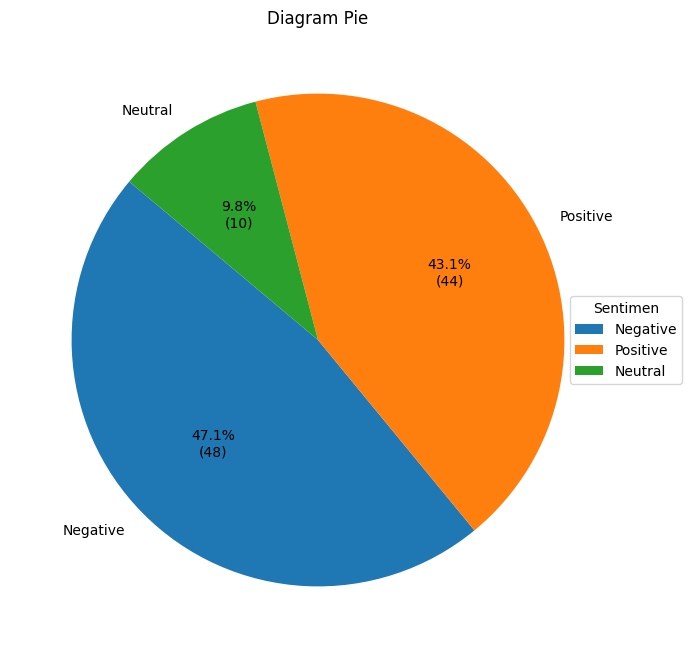

In [20]:
plt.figure(figsize=(8, 8))
plt.pie(sentimen_counts, labels=sentimen_counts.index, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(sentimen_counts) / 100),
        startangle=140)

plt.legend(sentimen_counts.index, title='Sentimen', loc='center', bbox_to_anchor=(1, 0.5))
plt.title('Diagram Pie')
plt.show()

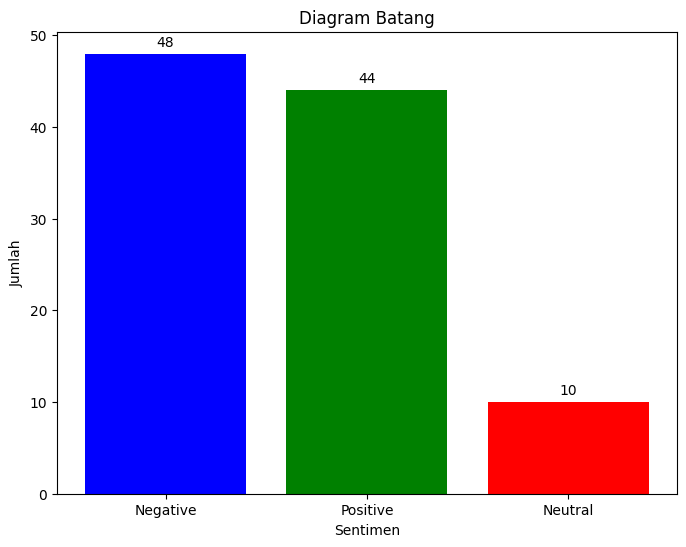

In [22]:
#sentimen count
sentimen_counts = translate['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']  #pemilihan warna (opsional)
bars = plt.bar(sentimen_counts.index, sentimen_counts.values, color=colors)
for bar, count in zip(bars, sentimen_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, count + 0.5, str(count), ha='center', va='bottom')

plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Diagram Batang')
plt.show()

# Kesimpulan

Berdasarkan analisis sentimen terhadap tweet yang berhasil di tarik, diperoleh hasil sebagai berikut:

1. Hasil mendapatkan sesuai target data, yakni 100 data tweet.
2. Sebagian besar tweet memiliki sentimen negative dengan jumlah 48 data.
3. Distribusi sentimen menunjukan bahwa orang-orang di Twitter cenderung lebih banyak memberikan opini negative pada topik 'Pemerintah Indonesia'.

**Pengembangan Selanjutnya**
- Menggunakan model **Machine Learning** untuk meningkatkan akurasi analisis sentimen.
- Scraping data dalam jumlah lebih besar untuk mendapatkan insight yang lebih akurat.
- Menggunakan **wordcloud** untuk melihat kata-kata yang paling sering muncul dalam setiap kategori sentimen.